In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('imdbTop250.csv')

df.drop(columns=['IMDBlink', 'Score', 'Cast1', 'Cast2', 'Cast3', 'Cast4'], inplace=True)
df.drop_duplicates (inplace=True)
df.rename(columns={'IMDByear': 'IMDB 250', 'Date' : 'Released'}, inplace=True)


In [134]:
df.sort_values(by=['Rating'], ascending=False)
pd.set_option('display.max_rows', 10)
print(df.head (10))

   Ranking  IMDB 250                     Title  Released  RunTime  \
0        1      1996                 Star Wars      1977      121   
1        2      1996  The Shawshank Redemption      1994      142   
2        3      1996             Trainspotting      1996       93   
3        4      1996        The Usual Suspects      1995      106   
4        5      1996        The Wrong Trousers      1993       30   
5        6      1996             A Close Shave      1995       30   
6        7      1996  Star Trek: First Contact      1996      111   
7        8      1996                Casablanca      1942      102   
8        9      1996              Blade Runner      1982      117   
9       10      1996          Schindler's List      1993      195   

                        Genre  Rating    Votes   Gross          Director  
0  Action, Adventure, Fantasy     8.6  1254781  322.74      George Lucas  
1                       Drama     9.3  2407245   28.34    Frank Darabont  
2              

In [135]:
df.Title.nunique() #Different movies which entered to IMDB Top250 lists from 1996 to 2020

732

In [136]:
all_time = []
movies = df.Title.unique().tolist()

for mov in movies:
    if df[df.Title == mov].shape[0] == 25:
        all_time.append(mov)

print(len(all_time))
all_time[:10] #Movies that are always in the IMDB Top250 lists from 1996 to 2020

78


['Star Wars',
 'The Shawshank Redemption',
 'Trainspotting',
 'The Usual Suspects',
 'Casablanca',
 'Blade Runner',
 "Schindler's List",
 'Citizen Kane',
 'Pulp Fiction',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']

In [137]:
vis = df[df['IMDB 250'] == df['Released']].sort_values('Ranking')
print(len(vis.Title.tolist()))

vis.Title.tolist()[:10] #Movies that  came out and entered the list same year

187


['The Lord of the Rings: The Fellowship of the Ring',
 'American Beauty',
 'Trainspotting',
 'The Lord of the Rings: The Return of the King',
 'The Dark Knight',
 'Saving Private Ryan',
 'Inception',
 'Star Trek: First Contact',
 'The Lord of the Rings: The Two Towers',
 'Titanic']

In [139]:
direc = []
directors = df.Director.unique().tolist()

for director in directors:
    temp = df[df.Director == director].groupby('IMDB 250').Title.count()
    if temp[temp >= 3].shape[0] == 25:
        direc.append(director)
len(direc)


#Directors who have 3 or more movies in the IMDB Top 250 Lists From 1996 to 2020

8

In [140]:
direc

['Steven Spielberg',
 'Stanley Kubrick',
 'Francis Ford Coppola',
 'Akira Kurosawa',
 'Alfred Hitchcock',
 'Sergio Leone',
 'Martin Scorsese',
 'Charles Chaplin']

In [141]:
num_movies, title_movies = [], []
for director in directors:
    temp = df[df.Director == director]
    num_movies.append(temp.Title.nunique())
    title_movies.append(str(temp.Title.unique()))
    
director_movies = pd.DataFrame({"Director": directors, "Number of Movies": num_movies, "Movies": title_movies})
director_movies = director_movies.sort_values("Number of Movies", ascending = False)
director_movies.head(10)

,Director,Number of Movies,Movies
34,Alfred Hitchcock,13,['Rear Window' 'North by Northwest' 'Vertigo' ...
11,Stanley Kubrick,10,['Dr. Strangelove or: How I Learned to Stop Wo...
8,Steven Spielberg,10,"[""Schindler's List"" 'Raiders of the Lost Ark'\..."
71,Billy Wilder,9,['Sunset Blvd.' 'Some Like It Hot' 'Sabrina' '...
49,Martin Scorsese,9,['Goodfellas' 'Taxi Driver' 'Raging Bull' 'Cas...
274,Christopher Nolan,8,['Memento' 'Batman Begins' 'The Prestige' 'The...
23,Akira Kurosawa,8,['Shichinin no samurai' 'Ran' 'Rashomon' 'Yoji...
94,Peter Jackson,8,['Braindead' 'Heavenly Creatures' 'Bad Taste'\...
238,Hayao Miyazaki,6,['Mononoke-hime' 'Sen to Chihiro no kamikakush...
35,David Fincher,6,['Se7en' 'The Game' 'Fight Club' 'The Curious ...


In [142]:
print(len(all_time))
all_time[:10] 

78


['Star Wars',
 'The Shawshank Redemption',
 'Trainspotting',
 'The Usual Suspects',
 'Casablanca',
 'Blade Runner',
 "Schindler's List",
 'Citizen Kane',
 'Pulp Fiction',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']

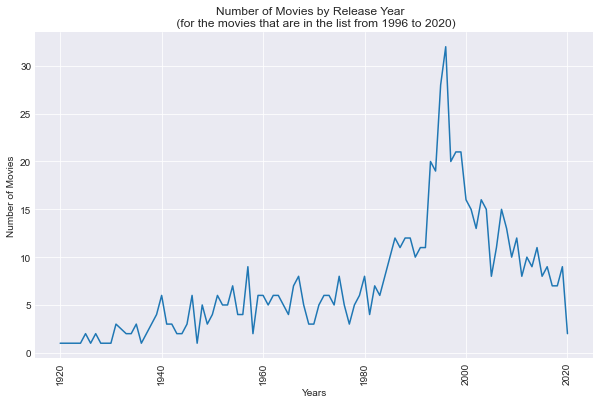

In [143]:
plt.figure(figsize = (10, 6))
plt.plot(df.groupby(['Released'])['Title'].nunique())
plt.xticks(rotation = 90)
plt.xlabel('Years')
plt.ylabel('Number of Movies')
plt.title("Number of Movies by Release Year  \n (for the movies that are in the list from 1996 to 2020)")
plt.show()

In [144]:
df

,Ranking,IMDB 250,Title,Released,RunTime,Genre,Rating,Votes,Gross,Director
0,1,1996,Star Wars,1977,121,"Action, Adventure, Fantasy",8.6,1254781,322.74,George Lucas
1,2,1996,The Shawshank Redemption,1994,142,Drama,9.3,2407245,28.34,Frank Darabont
2,3,1996,Trainspotting,1996,93,Drama,8.1,645186,16.50,Danny Boyle
3,4,1996,The Usual Suspects,1995,106,"Crime, Mystery, Thriller",8.5,1010775,23.34,Bryan Singer
4,5,1996,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,51747,NaN,Nick Park
...,...,...,...,...,...,...,...,...,...,...
6245,246,2020,The Help,2011,146,Drama,8.0,434956,169.71,Tate Taylor
6246,247,2020,The Princess Bride,1987,98,"Adventure, Family, Fantasy",8.1,400081,30.86,Rob Reiner
6247,248,2020,La battaglia di Algeri,1966,121,"Drama, War",8.1,54799,0.06,Gillo Pontecorvo
6248,249,2020,Mandariinid,2013,87,"Drama, War",8.2,42748,0.14,Zaza Urushadze


In [145]:
#df = pd.read_csv ('LT.csv')
#df